Problem Definition:

The bank is looking to improve customer retention strategies, optimize financial products, and better understand customer behavior across different segments. 

Objectives- This analysis will extract valuable insight to aid bank's decision making processes by understanding the following:

 Demographic Analysis:
1. Analyze the distribution of customers based on geography, gender, and age.
2. Identify any demographic segments (e.g., by geography or gender) that have a significantly different credit score, balance, or other financial metrics.

Customer Engagement Patterns:
1. Investigate the relationship between customer tenure and engagement (such as the number of products owned, HasCrCard, and IsActiveMember).
2. Analyze the impact of tenure on customer behavior, especially focusing on long-term customer patterns (e.g., do longer-tenured customers tend to hold more products or have higher balances?).

Financial Performance:
1. Explore credit score distribution and identify which customer segments (e.g., age, gender, geography) tend to have higher or lower credit scores.
2. Analyze customer balance and estimated salary patterns and compare them across different demographic groups.

Exited Customers Analysis:
1. Compare the financial and demographic characteristics of customers who exited the bank versus those who remain active.
2. Identify possible factors (e.g., age, credit score, balance) associated with customers exiting the bank.

Customer Segmentation:
1. Based on the available data, identify distinct customer segments (e.g., high-balance vs. low-balance customers) and analyze their unique characteristics.
2. Provide insights into how the bank could optimize its services for each segment, such as offering tailored products to certain demographics or improving engagement with less active members.

Approach:
To solve this problem, we need to utilize the standard approach: 
-Business Understanding 
-Data Mining 
-Data Understanding 
-Data preparation 
-Analysis of the data 
-Conclusion -Summary

In [1]:
###Import Libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

In [17]:
Customer_dataset = pd.read_excel('Bank_Churn_Messy.xlsx')

In [19]:
Account_dataset =pd.read_excel('Bank_Churn_Messy.xlsx',sheet_name= 'Account_Info')

In [21]:
Customer_dataset.head()

,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,EstimatedSalary
0,15634602,Hargrave,619,FRA,Female,42.0,2,€101348.88
1,15647311,Hill,608,Spain,Female,41.0,1,€112542.58
2,15619304,Onio,502,French,Female,42.0,8,€113931.57
3,15701354,Boni,699,FRA,Female,39.0,1,€93826.63
4,15737888,Mitchell,850,Spain,Female,43.0,2,€79084.1


In [23]:
Account_dataset.head()

,CustomerId,Balance,NumOfProducts,HasCrCard,Tenure,IsActiveMember,Exited
0,15634602,€0.0,1,Yes,2,Yes,1
1,15634602,€0.0,1,Yes,2,Yes,1
2,15647311,€83807.86,1,Yes,1,Yes,0
3,15619304,€159660.8,3,No,8,No,1
4,15701354,€0.0,2,No,1,No,0


In [15]:
Bank_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10001 entries, 0 to 10000
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   CustomerId       10001 non-null  int64  
 1   Surname          9998 non-null   object 
 2   CreditScore      10001 non-null  int64  
 3   Geography        10001 non-null  object 
 4   Gender           10001 non-null  object 
 5   Age              9998 non-null   float64
 6   Tenure           10001 non-null  int64  
 7   EstimatedSalary  10001 non-null  object 
dtypes: float64(1), int64(3), object(4)
memory usage: 625.2+ KB


In [25]:
Bank_dataset=pd.merge(Customer_dataset, Account_dataset, on = 'CustomerId', how='left')

In [27]:
Bank_dataset.head()

,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure_x,EstimatedSalary,Balance,NumOfProducts,HasCrCard,Tenure_y,IsActiveMember,Exited
0,15634602,Hargrave,619,FRA,Female,42.0,2,€101348.88,€0.0,1,Yes,2,Yes,1
1,15634602,Hargrave,619,FRA,Female,42.0,2,€101348.88,€0.0,1,Yes,2,Yes,1
2,15647311,Hill,608,Spain,Female,41.0,1,€112542.58,€83807.86,1,Yes,1,Yes,0
3,15619304,Onio,502,French,Female,42.0,8,€113931.57,€159660.8,3,No,8,No,1
4,15701354,Boni,699,FRA,Female,39.0,1,€93826.63,€0.0,2,No,1,No,0


In [31]:
Bank_dataset.shape

(10004, 14)

In [33]:
Bank_dataset.tail()

,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure_x,EstimatedSalary,Balance,NumOfProducts,HasCrCard,Tenure_y,IsActiveMember,Exited
9999,15682355,Sabbatini,772,Germany,Male,42.0,3,€92888.52,€75075.31,2,No,3,No,1
10000,15628319,Walker,792,French,Female,28.0,4,€38190.78,€130142.79,1,No,4,No,0
10001,15628319,Walker,792,French,Female,28.0,4,€38190.78,€130142.79,1,No,4,No,0
10002,15628319,Walker,792,French,Female,28.0,4,€38190.78,€130142.79,1,No,4,No,0
10003,15628319,Walker,792,French,Female,28.0,4,€38190.78,€130142.79,1,No,4,No,0


In [43]:
Bank_dataset.columns

Index(['CustomerId', 'Surname', 'CreditScore', 'Geography', 'Gender', 'Age',
       'Tenure_x', 'EstimatedSalary', 'Balance', 'NumOfProducts', 'HasCrCard',
       'Tenure_y', 'IsActiveMember', 'Exited'],
      dtype='object')

In [45]:
Bank_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10004 entries, 0 to 10003
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   CustomerId       10004 non-null  int64  
 1   Surname          10001 non-null  object 
 2   CreditScore      10004 non-null  int64  
 3   Geography        10004 non-null  object 
 4   Gender           10004 non-null  object 
 5   Age              10001 non-null  float64
 6   Tenure_x         10004 non-null  int64  
 7   EstimatedSalary  10004 non-null  object 
 8   Balance          10004 non-null  object 
 9   NumOfProducts    10004 non-null  int64  
 10  HasCrCard        10004 non-null  object 
 11  Tenure_y         10004 non-null  int64  
 12  IsActiveMember   10004 non-null  object 
 13  Exited           10004 non-null  int64  
dtypes: float64(1), int64(6), object(7)
memory usage: 1.1+ MB


### Data inconsistencies observed below:

-Age is a float and Age has 10001(incomplete) data.Change to Object
-Tenure X and Tenure Y needs to be merged
-Estimated salary is an object, change to int
-Balance is an Object, change to int
-Rename IsActive member to Active member
-Rename Hascrcard to Credit Card
-Change exited from int to Object



In [47]:
Bank_dataset.isnull().sum()

CustomerId         0
Surname            3
CreditScore        0
Geography          0
Gender             0
Age                3
Tenure_x           0
EstimatedSalary    0
Balance            0
NumOfProducts      0
HasCrCard          0
Tenure_y           0
IsActiveMember     0
Exited             0
dtype: int64

###

There are 3 null values on Surname and 3 null values in Age

In [49]:
Bank_dataset.duplicated(). sum()

4

##
There are 4 duplicated data tht needs to be dropped

In [51]:
Bank_dataset.describe()

,CustomerId,CreditScore,Age,Tenure_x,NumOfProducts,Tenure_y,Exited
count,1.000400e+04,10004.000000,10001.000000,10004.000000,10004.000000,10004.000000,10004.000000
mean,1.569092e+07,650.568073,38.919108,5.012195,1.529988,5.012195,0.203719
std,7.193218e+04,96.665531,10.488725,2.891806,0.581635,2.891806,0.402782
min,1.556570e+07,350.000000,18.000000,0.000000,1.000000,0.000000,0.000000
25%,1.562839e+07,584.000000,32.000000,3.000000,1.000000,3.000000,0.000000
50%,1.569071e+07,652.000000,37.000000,5.000000,1.000000,5.000000,0.000000
75%,1.575322e+07,718.000000,44.000000,7.000000,2.000000,7.000000,0.000000
max,1.581569e+07,850.000000,92.000000,10.000000,4.000000,10.000000,1.000000


In [61]:
len(Bank_dataset.Tenure_x == Bank_dataset.Tenure_y)

10004

DATA CLEANING

In [63]:
### create a copy of the data before we commence 

Bank_dataset_copy = Bank_dataset.copy()

In [65]:
#### drop duplicate column

Bank_dataset.drop('Tenure_y', axis=1 ,inplace=True)

In [67]:
Bank_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10004 entries, 0 to 10003
Data columns (total 13 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   CustomerId       10004 non-null  int64  
 1   Surname          10001 non-null  object 
 2   CreditScore      10004 non-null  int64  
 3   Geography        10004 non-null  object 
 4   Gender           10004 non-null  object 
 5   Age              10001 non-null  float64
 6   Tenure_x         10004 non-null  int64  
 7   EstimatedSalary  10004 non-null  object 
 8   Balance          10004 non-null  object 
 9   NumOfProducts    10004 non-null  int64  
 10  HasCrCard        10004 non-null  object 
 11  IsActiveMember   10004 non-null  object 
 12  Exited           10004 non-null  int64  
dtypes: float64(1), int64(5), object(7)
memory usage: 1016.2+ KB


### Rename Datasets:
-Rename Tenure_x to Tenure
-Rename IsActive member to Active member
-Rename Hascrcard to Credit Card

In [69]:
Bank_dataset.rename(columns=
                    {'Tenure_x' : 'Tenure',
                     'IsActiveMember' : 'ActiveMember','HasCrCard' : 'CreditCard'},inplace=True)


In [71]:
Bank_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10004 entries, 0 to 10003
Data columns (total 13 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   CustomerId       10004 non-null  int64  
 1   Surname          10001 non-null  object 
 2   CreditScore      10004 non-null  int64  
 3   Geography        10004 non-null  object 
 4   Gender           10004 non-null  object 
 5   Age              10001 non-null  float64
 6   Tenure           10004 non-null  int64  
 7   EstimatedSalary  10004 non-null  object 
 8   Balance          10004 non-null  object 
 9   NumOfProducts    10004 non-null  int64  
 10  CreditCard       10004 non-null  object 
 11  ActiveMember     10004 non-null  object 
 12  Exited           10004 non-null  int64  
dtypes: float64(1), int64(5), object(7)
memory usage: 1016.2+ KB


In [77]:
### Fill the null values in Age
Bank_dataset['Age']= Bank_dataset['Age'].fillna(Bank_dataset['Age'].median())


In [81]:
Bank_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10004 entries, 0 to 10003
Data columns (total 13 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   CustomerId       10004 non-null  int64  
 1   Surname          10001 non-null  object 
 2   CreditScore      10004 non-null  int64  
 3   Geography        10004 non-null  object 
 4   Gender           10004 non-null  object 
 5   Age              10004 non-null  float64
 6   Tenure           10004 non-null  int64  
 7   EstimatedSalary  10004 non-null  object 
 8   Balance          10004 non-null  object 
 9   NumOfProducts    10004 non-null  int64  
 10  CreditCard       10004 non-null  object 
 11  ActiveMember     10004 non-null  object 
 12  Exited           10004 non-null  int64  
dtypes: float64(1), int64(5), object(7)
memory usage: 1016.2+ KB


In [89]:
### fill null values in Surname...
Bank_dataset['Surname']= Bank_dataset['Surname'].fillna(Bank_dataset['Surname'].mode())

In [91]:
Bank_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10004 entries, 0 to 10003
Data columns (total 13 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   CustomerId       10004 non-null  int64 
 1   Surname          10001 non-null  object
 2   CreditScore      10004 non-null  int64 
 3   Geography        10004 non-null  object
 4   Gender           10004 non-null  object
 5   Age              10004 non-null  int64 
 6   Tenure           10004 non-null  int64 
 7   EstimatedSalary  10004 non-null  object
 8   Balance          10004 non-null  object
 9   NumOfProducts    10004 non-null  int64 
 10  CreditCard       10004 non-null  object
 11  ActiveMember     10004 non-null  object
 12  Exited           10004 non-null  int64 
dtypes: int64(6), object(7)
memory usage: 1016.2+ KB


In [83]:
Bank_dataset['Age']= Bank_dataset['Age'].astype(int)

In [87]:
Bank_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10004 entries, 0 to 10003
Data columns (total 13 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   CustomerId       10004 non-null  int64 
 1   Surname          10001 non-null  object
 2   CreditScore      10004 non-null  int64 
 3   Geography        10004 non-null  object
 4   Gender           10004 non-null  object
 5   Age              10004 non-null  int64 
 6   Tenure           10004 non-null  int64 
 7   EstimatedSalary  10004 non-null  object
 8   Balance          10004 non-null  object
 9   NumOfProducts    10004 non-null  int64 
 10  CreditCard       10004 non-null  object
 11  ActiveMember     10004 non-null  object
 12  Exited           10004 non-null  int64 
dtypes: int64(6), object(7)
memory usage: 1016.2+ KB


In [93]:
Bank_dataset = Bank_dataset.drop_duplicates()

In [95]:
Bank_dataset.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10000 entries, 0 to 10000
Data columns (total 13 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   CustomerId       10000 non-null  int64 
 1   Surname          9997 non-null   object
 2   CreditScore      10000 non-null  int64 
 3   Geography        10000 non-null  object
 4   Gender           10000 non-null  object
 5   Age              10000 non-null  int64 
 6   Tenure           10000 non-null  int64 
 7   EstimatedSalary  10000 non-null  object
 8   Balance          10000 non-null  object
 9   NumOfProducts    10000 non-null  int64 
 10  CreditCard       10000 non-null  object
 11  ActiveMember     10000 non-null  object
 12  Exited           10000 non-null  int64 
dtypes: int64(6), object(7)
memory usage: 1.1+ MB


In [97]:
###Fill the null values in surname with unknown
Bank_dataset['Surname'] = Bank_dataset['Surname'].fillna('Unknown')

In [99]:
Bank_dataset.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10000 entries, 0 to 10000
Data columns (total 13 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   CustomerId       10000 non-null  int64 
 1   Surname          10000 non-null  object
 2   CreditScore      10000 non-null  int64 
 3   Geography        10000 non-null  object
 4   Gender           10000 non-null  object
 5   Age              10000 non-null  int64 
 6   Tenure           10000 non-null  int64 
 7   EstimatedSalary  10000 non-null  object
 8   Balance          10000 non-null  object
 9   NumOfProducts    10000 non-null  int64 
 10  CreditCard       10000 non-null  object
 11  ActiveMember     10000 non-null  object
 12  Exited           10000 non-null  int64 
dtypes: int64(6), object(7)
memory usage: 1.1+ MB


In [101]:
Bank_dataset.head()

,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,EstimatedSalary,Balance,NumOfProducts,CreditCard,ActiveMember,Exited
0,15634602,Hargrave,619,FRA,Female,42,2,€101348.88,€0.0,1,Yes,Yes,1
2,15647311,Hill,608,Spain,Female,41,1,€112542.58,€83807.86,1,Yes,Yes,0
3,15619304,Onio,502,French,Female,42,8,€113931.57,€159660.8,3,No,No,1
4,15701354,Boni,699,FRA,Female,39,1,€93826.63,€0.0,2,No,No,0
5,15737888,Mitchell,850,Spain,Female,43,2,€79084.1,€125510.82,1,Yes,Yes,0


In [105]:
### Remove the € symbol and any commas, then convert to float
Bank_dataset['EstimatedSalary'] = Bank_dataset['EstimatedSalary'].replace('[€,]', '', regex=True).astype(float)


In [107]:
Bank_dataset['EstimatedSalary']= Bank_dataset['EstimatedSalary'].astype(int)

In [109]:
Bank_dataset.head()

,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,EstimatedSalary,Balance,NumOfProducts,CreditCard,ActiveMember,Exited
0,15634602,Hargrave,619,FRA,Female,42,2,101348,€0.0,1,Yes,Yes,1
2,15647311,Hill,608,Spain,Female,41,1,112542,€83807.86,1,Yes,Yes,0
3,15619304,Onio,502,French,Female,42,8,113931,€159660.8,3,No,No,1
4,15701354,Boni,699,FRA,Female,39,1,93826,€0.0,2,No,No,0
5,15737888,Mitchell,850,Spain,Female,43,2,79084,€125510.82,1,Yes,Yes,0


In [113]:
### Remove the symbol for Balance and retain as a float
Bank_dataset['Balance'] = Bank_dataset['Balance'].replace('[€,]', '', regex=True).astype(float)

In [115]:
Bank_dataset.tail()

,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,EstimatedSalary,Balance,NumOfProducts,CreditCard,ActiveMember,Exited
9996,15606229,Obijiaku,771,France,Male,39,5,96270,0.00,2,No,No,0
9997,15569892,Johnstone,516,French,Male,35,10,101699,57369.61,1,Yes,Yes,0
9998,15584532,Liu,709,FRA,Female,36,7,42085,0.00,1,Yes,Yes,1
9999,15682355,Sabbatini,772,Germany,Male,42,3,92888,75075.31,2,No,No,1
10000,15628319,Walker,792,French,Female,28,4,38190,130142.79,1,No,No,0


In [117]:
# Replace 1 with 'Yes' and 0 with 'No', then convert to object
Bank_dataset['Exited'] = Bank_dataset['Exited'].replace({1: 'Yes', 0: 'No'}).astype(object)


In [119]:
Bank_dataset.head()

,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,EstimatedSalary,Balance,NumOfProducts,CreditCard,ActiveMember,Exited
0,15634602,Hargrave,619,FRA,Female,42,2,101348,0.00,1,Yes,Yes,Yes
2,15647311,Hill,608,Spain,Female,41,1,112542,83807.86,1,Yes,Yes,No
3,15619304,Onio,502,French,Female,42,8,113931,159660.80,3,No,No,Yes
4,15701354,Boni,699,FRA,Female,39,1,93826,0.00,2,No,No,No
5,15737888,Mitchell,850,Spain,Female,43,2,79084,125510.82,1,Yes,Yes,No


In [121]:
Bank_dataset.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10000 entries, 0 to 10000
Data columns (total 13 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   CustomerId       10000 non-null  int64  
 1   Surname          10000 non-null  object 
 2   CreditScore      10000 non-null  int64  
 3   Geography        10000 non-null  object 
 4   Gender           10000 non-null  object 
 5   Age              10000 non-null  int64  
 6   Tenure           10000 non-null  int64  
 7   EstimatedSalary  10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  CreditCard       10000 non-null  object 
 11  ActiveMember     10000 non-null  object 
 12  Exited           10000 non-null  object 
dtypes: float64(1), int64(6), object(6)
memory usage: 1.1+ MB


In [125]:
Bank_dataset['Geography']=Bank_dataset['Geography'].replace(['FRA','French'],'France')  

In [127]:
Bank_dataset.tail()

,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,EstimatedSalary,Balance,NumOfProducts,CreditCard,ActiveMember,Exited
9996,15606229,Obijiaku,771,France,Male,39,5,96270,0.00,2,No,No,No
9997,15569892,Johnstone,516,France,Male,35,10,101699,57369.61,1,Yes,Yes,No
9998,15584532,Liu,709,France,Female,36,7,42085,0.00,1,Yes,Yes,Yes
9999,15682355,Sabbatini,772,Germany,Male,42,3,92888,75075.31,2,No,No,Yes
10000,15628319,Walker,792,France,Female,28,4,38190,130142.79,1,No,No,No


### DATA ANALYSIS AND EXPLORATION
Demographic Analysis:
1. Analyze the distribution of customers based on geography, gender, and age.
2. Identify any demographic segments (e.g., by geography or gender) that have a significantly different credit score, balance, or other financial metrics.


/var/folders/3_/gnglj55n7j3fkf_5rftn0nqc0000gn/T/ipykernel_54290/1341513443.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sb.countplot(data=Bank_dataset, x='Geography', palette='viridis')


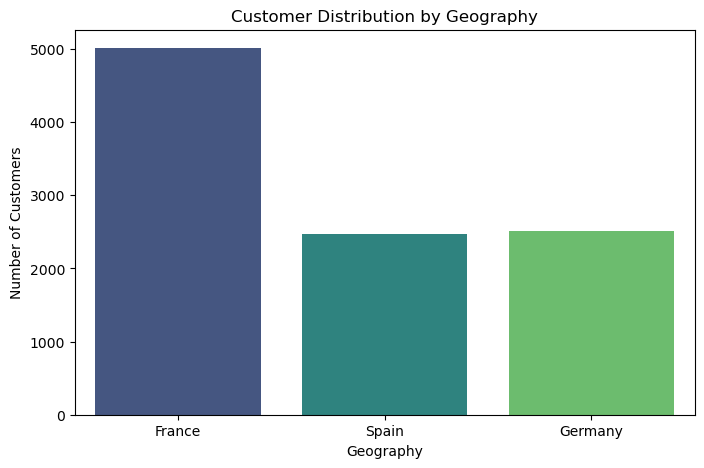

In [129]:
## Distribution of Customers based on Geography, Gender and Age.

# Count plot for Geography

plt.figure(figsize=(8, 5))
sb.countplot(data=Bank_dataset, x='Geography', palette='viridis')
plt.title('Customer Distribution by Geography')
plt.xlabel('Geography')
plt.ylabel('Number of Customers')
plt.show()


There are three countries France, Spain and Germany. France has the highest number of customers with Spain and Germany at slightly equal distribution of customers

/var/folders/3_/gnglj55n7j3fkf_5rftn0nqc0000gn/T/ipykernel_54290/1648530377.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sb.countplot(data=Bank_dataset, x='Gender', palette='viridis')


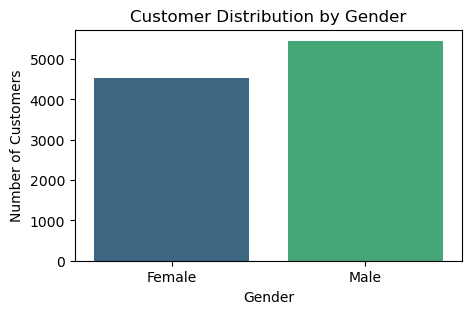

In [131]:
plt.figure(figsize=(5,3))
sb.countplot(data=Bank_dataset, x='Gender', palette='viridis')
plt.title('Customer Distribution by Gender')
plt.xlabel('Gender')
plt.ylabel('Number of Customers')
plt.show()
           

In [ ]:
There are more male than female customers by gender distribution.